In [1]:
#11장. 순환신경망
#RNN(Recurrent Neural Network)

#사인파, 주가 예측, 시계열 데이터(time-series data): 미래의 데이터 예측

#순차 데이터: 과거의 데이터 기억 → 정확한 예측

#표준 신경망(MLP, CNN)
#ex) 음성 인식, 감정 분석, 자동 번역(RNN)

# RNN 기능
# 1) 가변 길의의 입력 처리
# 2) 장기 의존성 추적
# 3) 순서에 대한 정보 유지
# 4) 시퀀스 전체 파라미터 공유

#BeautifulSoup4 & finance-darameter

In [4]:
pip install finance-datareader

  Using cached finance_datareader-0.9.33-py3-none-any.whl (48 kB)
  Using cached requests_file-1.5.1-py2.py3-none-any.whl (3.7 kB)
Note: you may need to restart the kernel to use updated packages.


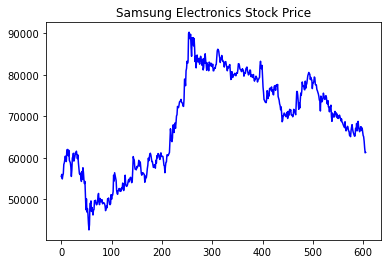

In [5]:
# 라이브러리 포함
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

# 삼성전자 코드='005930', 2020년 데이터부터 다운로드
samsung = fdr.DataReader('005930', '2020')

# 시작가만 취한다.
seq_data = (samsung[['Open']]).to_numpy()
# 선형 그래프로 그린다.
plt.plot(seq_data, color='blue')
plt.title("Samsung Electronics Stock Price")
plt.xlabel("days")
plt.xlabel("")
plt.show()

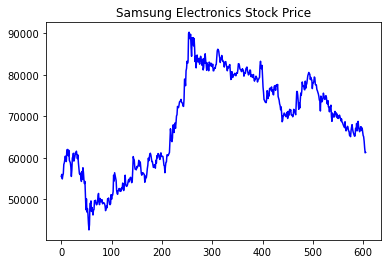

In [7]:
# 라이브러리 포함
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

# 삼성전자 코드='005930', 2020년 데이터부터 다운로드
samsung = fdr.DataReader('005930', '2020')

# 시작가만 취한다.
seq_data = (samsung[['Open']]).to_numpy()
# 선형 그래프로 그린다.
plt.plot(seq_data, color='blue')
plt.title("Samsung Electronics Stock Price")
plt.xlabel("days")
plt.xlabel("")
plt.show()

In [8]:
seq_data = (samsung[['Open']]).to_numpy()

def make_sample(data, window):
    train = []					# 공백 리스트 생성
    target = []
    for i in range(len(data)-window):		# 데이터의 길이만큼 반복
        train.append(data[i:i+window])		# i부터 (i+window-1) 까지를 저장
        target.append(data[i+window])		# (i+window) 번째 요소는 정답
    return np.array(train), np.array(target)	# 훈련 샘플과 정답 레이블을 반환

X, y = make_sample(seq_data, 7)		# 윈도우 크기=7
print(X.shape, y.shape)			# 넘파이 배열의 형상 출력
print(X[0], y[0])				# 첫 번째 샘플 출력

(599, 7, 1) (599, 1)
[[55500]
 [56000]
 [54900]
 [55700]
 [56200]
 [58400]
 [58800]] [59600]


In [ ]:
#RNN의 작동 원리
#feed-forward neural network

#output layer
#시간 축 layer

#weight 값 에측
#오차(BP) → 시간 축을 기준으로 학습 → BPTT

#★(중요한 식!) ht = fw[h(t-1), xt]
#fw(활성화 함수) → tanh, ReLU

#RNN의 유형
# 1) 1 : 1 - 단일 입력(시계열 데이터) → input - output
# 2) 1 : 다(多) → 다중 출력 ex) 이미지 캡션
# 3) 多 : 1
# 4) 多 : 多 → 기계 번역

#순방향 패스
#은닉층 → tan h → 多 : 1